In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
# Columns are datetime, upper temperature, lower temperature, heater temperature
frame = pd.read_csv('../data/tree4_log.csv', usecols=[1,2,3])
# Since we're not actually using the date, we won't bother parsing it.
print(frame)
len = 152 #Each pulse is 152 samples long
frame = frame.to_numpy()
print(frame)

       upper  lower  heater
0       6.91   6.75    3.86
1       6.94   6.80    6.76
2       6.97   6.83    6.78
3       6.98   6.85    6.80
4       7.00   6.86    6.82
...      ...    ...     ...
33131   3.80  11.40   10.54
33132   3.79  11.43   10.25
33133   3.79  11.45   10.14
33134   3.79  11.40   10.55
33135   3.79  11.35   10.39

[33136 rows x 3 columns]
[[ 6.91  6.75  3.86]
 [ 6.94  6.8   6.76]
 [ 6.97  6.83  6.78]
 ...
 [ 3.79 11.45 10.14]
 [ 3.79 11.4  10.55]
 [ 3.79 11.35 10.39]]


In [27]:
data = np.reshape(frame, (-1, len, 3))

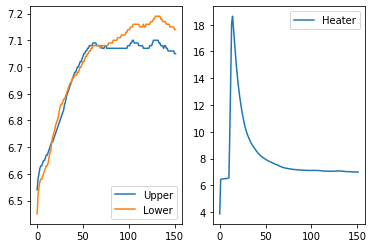

In [37]:
plt.subplot(121)
plt.plot(data[10,:,0], label='Upper')
plt.plot(data[10,:,1], label='Lower')
plt.legend()
plt.subplot(122)
plt.plot(data[10,:,2], label='Heater')
plt.legend()
plt.show()